In [270]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_columns = 1000
pd.set_option('future.no_silent_downcasting', True)

path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/cars.csv"

In [271]:
df = pd.read_csv(path)

df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...
887,Ta,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,2014,"1,80,000",Petrol,NaN


In [272]:
df = df[df['Price'] != 'Ask For Price']
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel
6,Ford Figo,2012,"1,75,000","41,000 kms",Diesel
...,...,...,...,...,...
887,Ta,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,2014,"1,80,000",Petrol,NaN


In [273]:
df['Price'].unique()

array(['80,000', '4,25,000', '3,25,000', '5,75,000', '1,75,000',
       '1,90,000', '8,30,000', '2,50,000', '1,82,000', '3,15,000',
       '4,15,000', '3,20,000', '10,00,000', '5,00,000', '3,50,000',
       '1,60,000', '3,10,000', '75,000', '1,00,000', '2,90,000', '95,000',
       '1,80,000', '3,85,000', '1,05,000', '6,50,000', '6,89,999',
       '4,48,000', '5,49,000', '5,01,000', '4,89,999', '2,80,000',
       '3,49,999', '2,84,999', '3,45,000', '4,99,999', '2,35,000',
       '2,49,999', '14,75,000', '3,95,000', '2,20,000', '1,70,000',
       '85,000', '2,00,000', '5,70,000', '1,10,000', '4,48,999',
       '18,91,111', '1,59,500', '3,44,999', '4,49,999', '8,65,000',
       '6,99,000', '3,75,000', '2,24,999', '12,00,000', '1,95,000',
       '3,51,000', '2,40,000', '90,000', '1,55,000', '6,00,000',
       '1,89,500', '2,10,000', '3,90,000', '1,35,000', '16,00,000',
       '7,01,000', '2,65,000', '5,25,000', '3,72,000', '6,35,000',
       '5,50,000', '4,85,000', '3,29,500', '2,51,111', 

In [274]:
df['Price'] = df['Price'].map(lambda x: x.replace(",", "")[:-2])
df

C:\Users\Grand\AppData\Local\Temp\ipykernel_5292\1093165330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].map(lambda x: x.replace(",", "")[:-2])


,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,4250,40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,5750,"36,000 kms",Diesel
6,Ford Figo,2012,1750,"41,000 kms",Diesel
...,...,...,...,...,...
887,Ta,zest,3100,NaN,NaN
888,Tata Zest XM Diesel,2018,2600,"27,000 kms",Diesel
889,Mahindra Quanto C8,2013,3900,"40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,2014,1800,Petrol,NaN


In [275]:
df['kms_driven'] [df['kms_driven'] == 'Petrol']

890    Petrol
891    Petrol
Name: kms_driven, dtype: object

In [276]:
mask = df['kms_driven'] == 'Petrol'

df.loc[mask, 'fuel_type'] = df.loc[mask, 'kms_driven']

df.loc[mask, 'kms_driven'] = np.nan

df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,4250,40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,5750,"36,000 kms",Diesel
6,Ford Figo,2012,1750,"41,000 kms",Diesel
...,...,...,...,...,...
887,Ta,zest,3100,NaN,NaN
888,Tata Zest XM Diesel,2018,2600,"27,000 kms",Diesel
889,Mahindra Quanto C8,2013,3900,"40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,2014,1800,NaN,Petrol


In [277]:
df = df[df['fuel_type'].isna() != True]

In [278]:
df['fuel_type'].isna().value_counts()

fuel_type
False    818
Name: count, dtype: int64

In [279]:
df = df.reset_index(drop=True)
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,4250,40 kms,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250,"28,000 kms",Petrol
3,Ford EcoSport Titanium 1.5L TDCi,2014,5750,"36,000 kms",Diesel
4,Ford Figo,2012,1750,"41,000 kms",Diesel
...,...,...,...,...,...
813,Toyota Corolla Altis,2009,3000,"1,32,000 kms",Petrol
814,Tata Zest XM Diesel,2018,2600,"27,000 kms",Diesel
815,Mahindra Quanto C8,2013,3900,"40,000 kms",Diesel
816,Honda Amaze 1.2 E i VTEC,2014,1800,NaN,Petrol


In [280]:
df['kms_driven'] = df['kms_driven'].astype(str)

In [281]:
df['kms_driven'] = df['kms_driven'].map(lambda x: x.replace(",", "")[:-4])

In [282]:
df['year'] = pd.to_numeric(df['year'])
df['Price'] = pd.to_numeric(df['Price'])
df['kms_driven'] = pd.to_numeric(df['kms_driven'])

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        818 non-null    object 
 1   year        818 non-null    int64  
 2   Price       818 non-null    int64  
 3   kms_driven  816 non-null    float64
 4   fuel_type   818 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 32.1+ KB


In [284]:
df = df[df['kms_driven'].isna() != True]
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800,45000.000,Petrol
1,Mahindra Jeep CL550 MDI,2006,4250,40.000,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250,28000.000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,2014,5750,36000.000,Diesel
4,Ford Figo,2012,1750,41000.000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,2011,2700,50000.000,Petrol
812,Tata Indica V2 DLE BS III,2009,1100,30000.000,Diesel
813,Toyota Corolla Altis,2009,3000,132000.000,Petrol
814,Tata Zest XM Diesel,2018,2600,27000.000,Diesel


<Axes: >

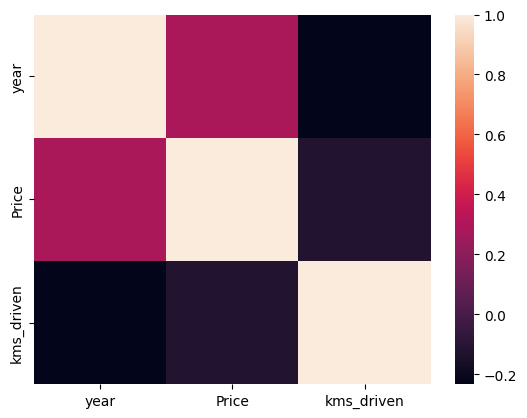

In [285]:
corr = df[['year', 'Price', 'kms_driven']]

sns.heatmap(corr.corr())

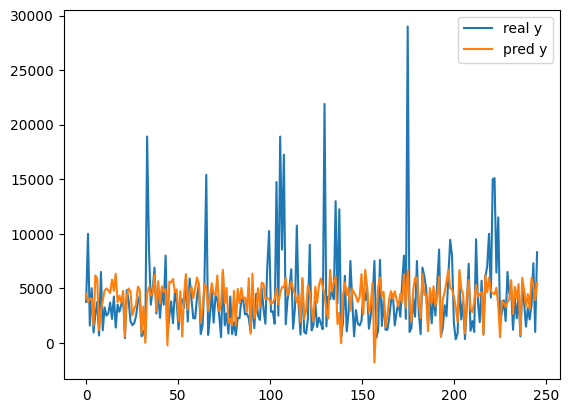

In [286]:
target = 'Price'
X = corr.drop(target,axis=1).values
y = corr[target].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=667, )

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

lenght = y_pred.shape[0]
x = np.linspace(0, lenght, lenght)

plt.plot(x, y_test, label = 'real y')
plt.plot(x, y_pred, label = 'pred y')
plt.legend()

In [287]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.12062666229307228